In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from numpy.random import randn
np.random.seed(101)

In [3]:
df = pd.DataFrame(randn(5,4),index='A B C D E'.split(),columns='W X Y Z'.split())

In [4]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [6]:
df['W']

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [7]:
df[['W','Z']]

,W,Z
A,2.706850,0.503826
B,0.651118,0.605965
C,-2.018168,-0.589001
D,0.188695,0.955057
E,0.190794,0.683509


In [8]:
df.W

A    2.706850
B    0.651118
C   -2.018168
D    0.188695
E    0.190794
Name: W, dtype: float64

In [9]:
type(df['W'])

pandas.core.series.Series

In [10]:
# Creating new column
df['new'] = df['W'] + df['Y']

In [11]:
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [12]:
# Removing a column
df.drop('new',axis=1)
df

,W,X,Y,Z,new
A,2.706850,0.628133,0.907969,0.503826,3.614819
B,0.651118,-0.319318,-0.848077,0.605965,-0.196959
C,-2.018168,0.740122,0.528813,-0.589001,-1.489355
D,0.188695,-0.758872,-0.933237,0.955057,-0.744542
E,0.190794,1.978757,2.605967,0.683509,2.796762


In [13]:
# Why did the above not work?
# ... it worked, but a new copy of df was created by default ...

In [14]:
# However, if we want to drop a column without creating a copy, we can use "inplace" as shown below
df.drop('new',axis=1,inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057
E,0.190794,1.978757,2.605967,0.683509


In [15]:
# Can also drop rows
df.drop('E',axis=0, inplace=True)
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [ ]:
# Selecting rows
df.loc['A']

W    2.706850
X    0.628133
Y    0.907969
Z    0.503826
Name: A, dtype: float64

In [19]:
# Or select based on the row position instead of label (Note: row numbering starts at '0')
# The following statement selects the third row
df.iloc[2]

W   -2.018168
X    0.740122
Y    0.528813
Z   -0.589001
Name: C, dtype: float64

In [20]:
df

,W,X,Y,Z
A,2.706850,0.628133,0.907969,0.503826
B,0.651118,-0.319318,-0.848077,0.605965
C,-2.018168,0.740122,0.528813,-0.589001
D,0.188695,-0.758872,-0.933237,0.955057


In [21]:
# Selecting subset of rows and columns
df.loc['B','Y']

np.float64(-0.8480769834036315)

In [22]:
df.loc[['A','B'],['W','Y']]

,W,Y
A,2.706850,0.907969
B,0.651118,-0.848077


In [23]:
#Data Analysis using Pandas: Merging, Grouping, Descriptive statistics, Data Visualization

In [24]:
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                          'C': ['C0', 'C1', 'C2', 'C3'],
                          'D': ['D0', 'D1', 'D2', 'D3']})

In [25]:
left

,key,A,B
0,K0,A0,B0
1,K1,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [26]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [27]:
pd.merge(left,right,how='inner',on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,A1,B1,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [28]:
# Create dataframe
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'position': ['G', 'F', 'F', 'G', 'F', 'F', 'G', 'G'],
                   'points': [30, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [4, 3, 7, 7, 12, 15, 8, 4]})
print(df)

  team position  points  assists
0    A        G      30        4
1    A        F      22        3
2    A        F      19        7
3    A        G      14        7
4    B        F      14       12
5    B        F      11       15
6    B        G      20        8
7    B        G      28        4


In [29]:
by_team=df.groupby('team')

In [30]:
df

,team,position,points,assists
0,A,G,30,4
1,A,F,22,3
2,A,F,19,7
3,A,G,14,7
4,B,F,14,12
5,B,F,11,15
6,B,G,20,8
7,B,G,28,4


In [31]:
df = pd.DataFrame({'team': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B'],
                   'position': ['G', 'F', 'F', 'G', 'F', 'F', 'G', 'G'],
                   'points': [30, 22, 19, 14, 14, 11, 20, 28],
                   'assists': [4, 3, 7, 7, 12, 15, 8, 4]})
print(df)
by_team=df.groupby('team')
print(by_team['points'].mean())

  team position  points  assists
0    A        G      30        4
1    A        F      22        3
2    A        F      19        7
3    A        G      14        7
4    B        F      14       12
5    B        F      11       15
6    B        G      20        8
7    B        G      28        4
team
A    21.25
B    18.25
Name: points, dtype: float64


In [32]:
df.groupby('team')['points'].mean()

team
A    21.25
B    18.25
Name: points, dtype: float64

In [33]:
by_team['points'].std()

team
A    6.70199
B    7.50000
Name: points, dtype: float64

In [34]:
by_team['points'].min()

team
A    14
B    11
Name: points, dtype: int64

In [35]:
by_team['points'].max()

team
A    30
B    28
Name: points, dtype: int64

In [36]:
by_team.count()

,position,points,assists
team,,,
A,4,4,4
B,4,4,4


In [37]:
by_team.describe()

points                                                assists        \
      count   mean      std   min    25%   50%   75%   max   count  mean   
team                                                                       
A       4.0  21.25  6.70199  14.0  17.75  20.5  24.0  30.0     4.0  5.25   
B       4.0  18.25  7.50000  11.0  13.25  17.0  22.0  28.0     4.0  9.75   

                                              
           std  min   25%   50%    75%   max  
team                                          
A     2.061553  3.0  3.75   5.5   7.00   7.0  
B     4.787136  4.0  7.00  10.0  12.75  15.0

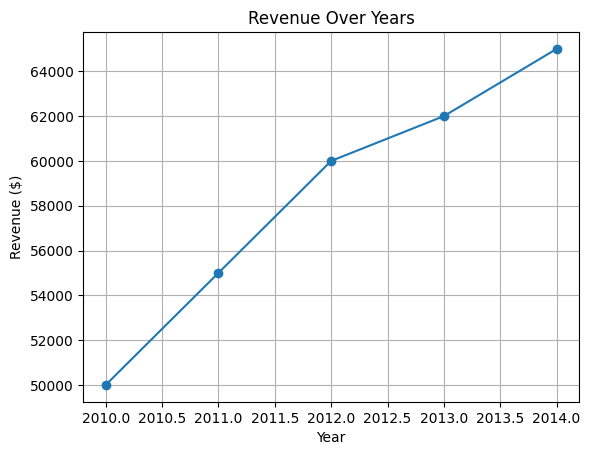

In [38]:
# Create a DataFrame
data = {'Year': [2010, 2011, 2012, 2013, 2014],
        'Revenue': [50000, 55000, 60000, 62000, 65000]}

df = pd.DataFrame(data)

# Create a line plot
plt.plot(df['Year'], df['Revenue'], marker='o')
plt.title('Revenue Over Years')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.show()

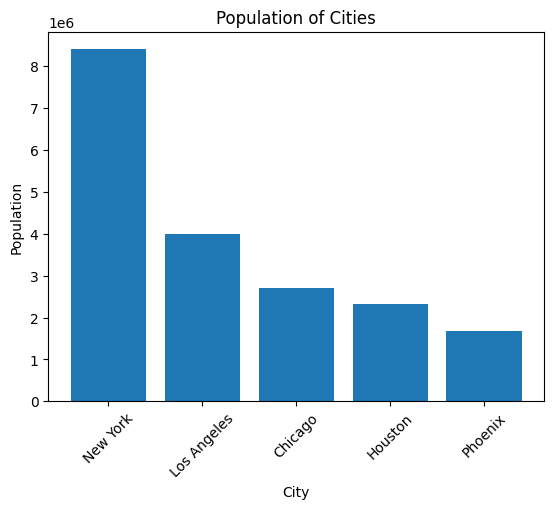

In [39]:
# Create a DataFrame
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'],
        'Population': [8398748, 3990456, 2716000, 2320268, 1680992]}

df = pd.DataFrame(data)

# Create a bar plot
plt.bar(df['City'], df['Population'])
plt.title('Population of Cities')
plt.xlabel('City')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.show()

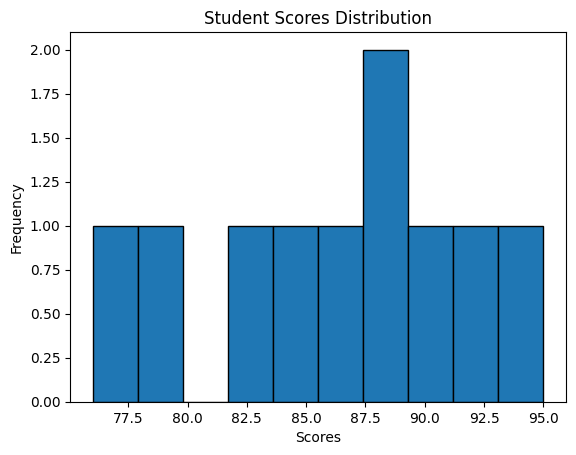

In [40]:
# Create a DataFrame
data = {'Scores': [85, 92, 78, 95, 88, 76, 89, 91, 83, 87]}

df = pd.DataFrame(data)

# Create a histogram
plt.hist(df['Scores'], bins=10, edgecolor='black')
plt.title('Student Scores Distribution')
plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.show()

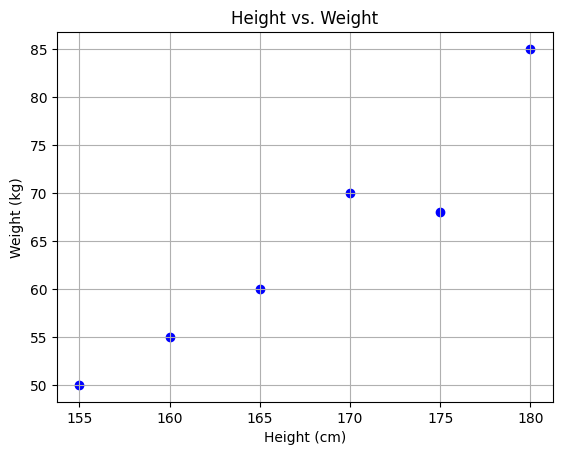

In [41]:
# Create a DataFrame
data = {'Height': [165, 170, 155, 180, 160, 175],
        'Weight': [60, 70, 50, 85, 55, 68]}

df = pd.DataFrame(data)

# Create a scatter plot
plt.scatter(df['Height'], df['Weight'], color='blue')
plt.title('Height vs. Weight')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.grid(True)
plt.show()

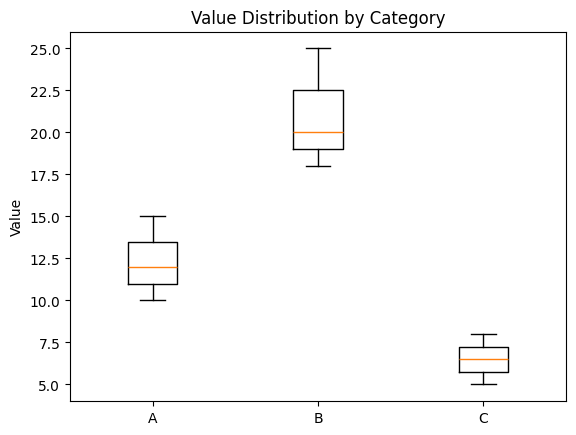

In [42]:
# Create a DataFrame
data = {'Category': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'B'],
        'Value': [10, 20, 15, 5, 25, 8, 12, 18]}

df = pd.DataFrame(data)

# Create a box plot
plt.boxplot([df[df['Category'] == 'A']['Value'],
             df[df['Category'] == 'B']['Value'],
             df[df['Category'] == 'C']['Value']],
            tick_labels=['A', 'B', 'C'])
plt.title('Value Distribution by Category')
plt.ylabel('Value')
plt.show()

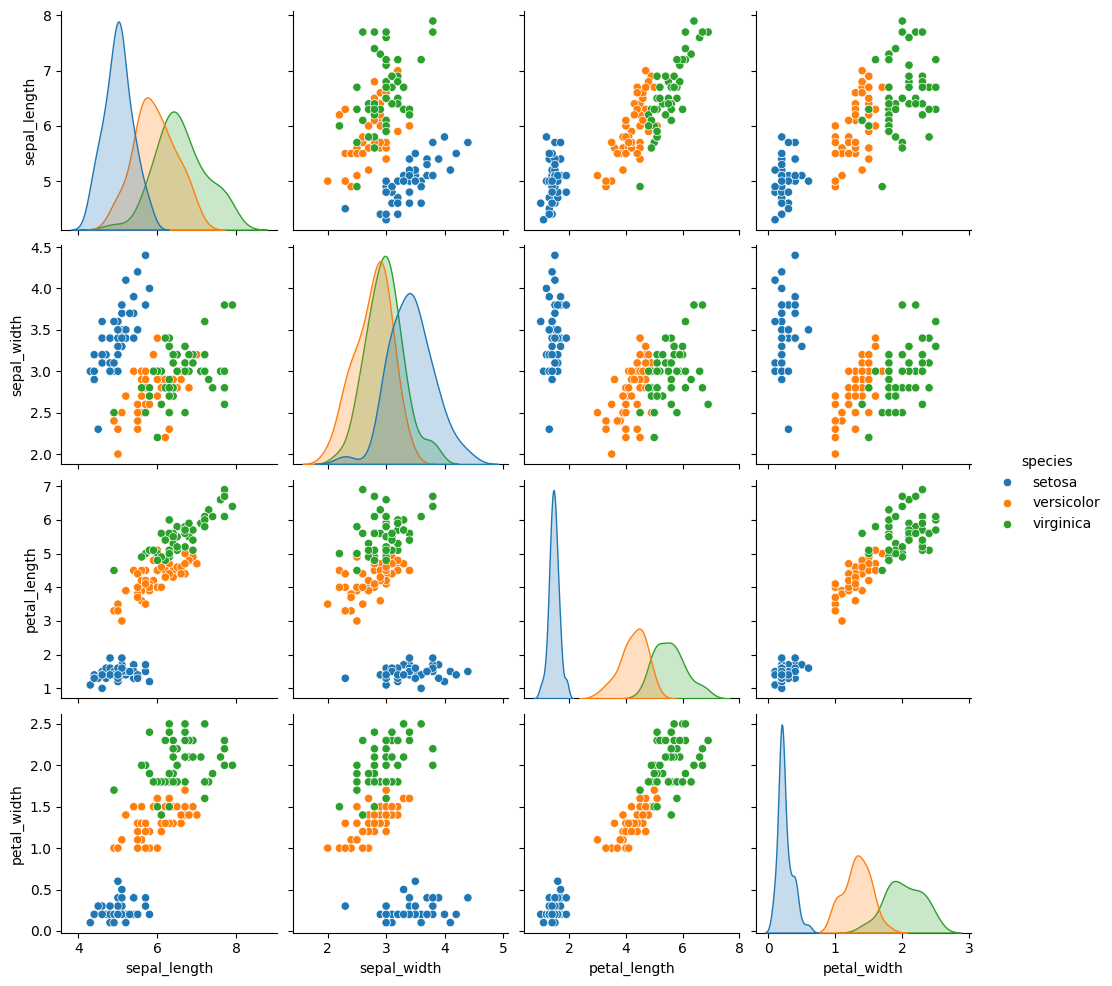

In [43]:
# Load a dataset
iris = sns.load_dataset('iris')

# Create pair-wise plots
sns.pairplot(iris, hue='species')
plt.show()

In [44]:
#Data Cleaning
import pandas as pd

# Sample data with missing values
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve', "Alice"],
        'Age': [25, None, 30, 28, 22, 25],
        'Salary': [50000, 60000, None, 55000, 45000, 50000]}

df = pd.DataFrame(data)
print("Original Dataset:")
print(df)

# Handling missing values
df = df.assign(
    Age=df['Age'].fillna(df['Age'].median()),
    Salary=df['Salary'].fillna(df['Salary'].mean())
)

# Drop duplicates
df = df.drop_duplicates()

print("\nDataset after data cleaning and removing duplicates:")
print(df)

Original Dataset:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob   NaN  60000.0
2  Charlie  30.0      NaN
3    David  28.0  55000.0
4      Eve  22.0  45000.0
5    Alice  25.0  50000.0

Dataset after data cleaning and removing duplicates:
      Name   Age   Salary
0    Alice  25.0  50000.0
1      Bob  25.0  60000.0
2  Charlie  30.0  52000.0
3    David  28.0  55000.0
4      Eve  22.0  45000.0


In [45]:
#Outlier Detection
# Create a sample dataset with outliers
np.random.seed(42)
data = {'Value': np.concatenate((np.random.normal(10, 2, 100), [100, 200, 300]))}
df = pd.DataFrame(data)

# Detect and handle outliers
Q1 = df['Value'].quantile(0.25) # Basically, the 25th percentile
Q3 = df['Value'].quantile(0.75) # Basically, the 75th percentile
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_cleaned = df[(df['Value'] >= lower_bound) & (df['Value'] <= upper_bound)]

print("Original Dataset:")
print(df)

print("\nCleaned Dataset after Outlier Removal:")
print(df_cleaned)

Original Dataset:
          Value
0     10.993428
1      9.723471
2     11.295377
3     13.046060
4      9.531693
..          ...
98    10.010227
99     9.530826
100  100.000000
101  200.000000
102  300.000000

[103 rows x 1 columns]

Cleaned Dataset after Outlier Removal:
        Value
0   10.993428
1    9.723471
2   11.295377
3   13.046060
4    9.531693
..        ...
95   7.072970
96  10.592241
97  10.522111
98  10.010227
99   9.530826

[99 rows x 1 columns]
